In [2]:
%pylab inline
from PIL import Image
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
ImageTotal = np.asarray(Image.open('Rst/OlivoTotal.png'))
ImageTemplate = np.asarray(Image.open('Rst/OlivoTemplate_small.png'))

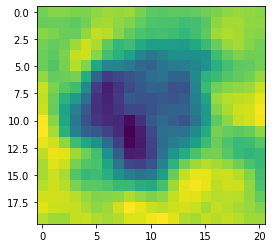

In [6]:
# work with 1 band
image = ImageTotal[:,:,1]
template = ImageTemplate[:,:,1]
imshow(template)

In [7]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import match_template

In [12]:
result = match_template(image, template)
ij = np.unravel_index(np.argmax(result), result.shape)
#ij = (381, 280)
x, y = ij[::-1]
#x, y = (280, 381)

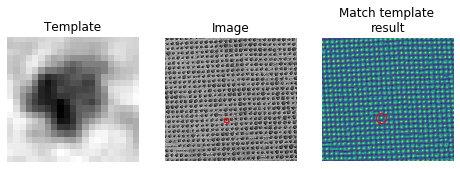

In [16]:
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(template, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('Template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('Image')

# hightlight matched region
htmplt, wtmplt = template.shape
rect = plt.Rectangle((x, y), wtmplt, htmplt, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('Match template \nresult')

# hightlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

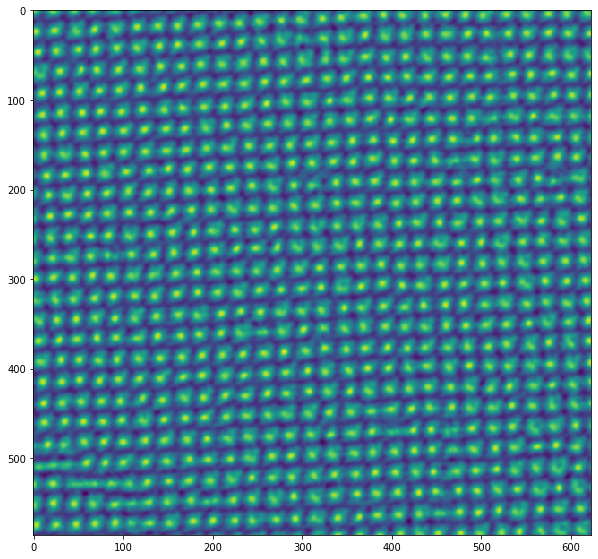

In [32]:
# closer look at result
figure(figsize = (10, 10))
plt.imshow(result)

In [33]:
# filter results to match similar trees
resultfilter = np.where(result > 0.85)
resultmax = np.where(result > 0.99)

In [34]:
print(shape(resultfilter))
print(shape(result))
print(shape(image))

(2, 554)
(586, 623)
(605, 643)


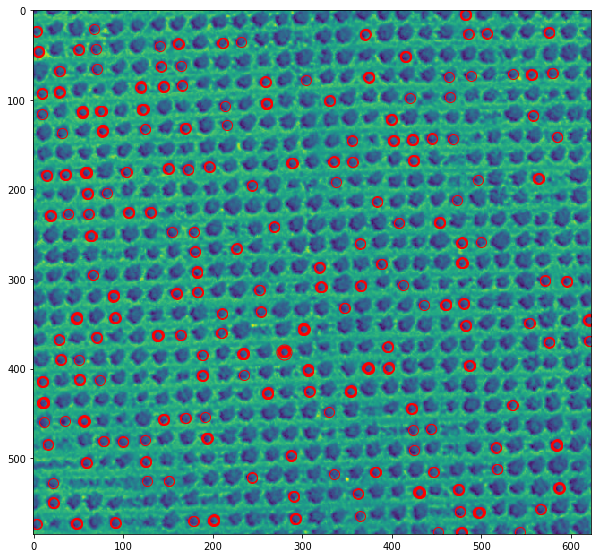

In [56]:
# show best result
# figsize(10, 10)

for p in range(shape(resultfilter)[1]):
    plot(resultfilter[1][p], resultfilter[0][p], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plot(resultmax[1][0], resultmax[0][0], 'o', markeredgecolor='r', markerfacecolor='none', markersize=15)

plt.imshow(image[10:-10,10:-10])